In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 3

In [3]:
ds_eddy = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/Operator2-dealias-96/*.nc', combine='nested', concat_dim='run')[['q', 'q_forcing_advection']].load()
ds_jet = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/jet/Operator2-dealias-48/*.nc', combine='nested', concat_dim='run')[['q', 'q_forcing_advection']].load()

In [4]:
from pyqg_generative.models.ann_model import ANNModel

In [5]:
ds_train = [ds_eddy.isel(run=slice(0,5)), ds_jet.isel(run=slice(0,5))]
ds_test = [ds_eddy.isel(run=slice(5,10)), ds_jet.isel(run=slice(5,10))]

In [7]:
net = ANNModel(read=False)
net.fit(ds_train, ds_test, num_epochs=50)

Training starts on device cpu, number of samples 1100800
[1/50] [0.36/17.50] Loss: [1.008, 1.017]
[2/50] [0.36/17.17] Loss: [0.995, 1.008]
[3/50] [0.36/16.83] Loss: [0.985, 0.996]
[4/50] [0.36/16.47] Loss: [0.970, 0.978]
[5/50] [0.36/16.14] Loss: [0.955, 0.967]
[6/50] [0.36/15.80] Loss: [0.948, 0.963]
[7/50] [0.36/15.43] Loss: [0.944, 0.959]
[8/50] [0.36/15.09] Loss: [0.942, 0.957]
[9/50] [0.36/14.72] Loss: [0.939, 0.955]
[10/50] [0.36/14.37] Loss: [0.937, 0.953]
[11/50] [0.38/14.07] Loss: [0.935, 0.950]
[12/50] [0.36/13.71] Loss: [0.933, 0.948]
[13/50] [0.36/13.33] Loss: [0.930, 0.946]
[14/50] [0.36/12.97] Loss: [0.928, 0.943]
[15/50] [0.36/12.60] Loss: [0.925, 0.941]
[16/50] [0.36/12.24] Loss: [0.923, 0.939]
[17/50] [0.36/11.88] Loss: [0.921, 0.937]
[18/50] [0.36/11.52] Loss: [0.918, 0.934]
[19/50] [0.36/11.16] Loss: [0.916, 0.931]
[20/50] [0.36/10.80] Loss: [0.914, 0.929]
[21/50] [0.36/10.44] Loss: [0.911, 0.927]
[22/50] [0.36/10.08] Loss: [0.909, 0.923]
[23/50] [0.36/9.72] Loss: [0

In [54]:
import pyqg
m = pyqg.QGModel()

INFO:  Logger initialized


In [55]:
m.q = ds.q.isel(run=0,time=-1).values.astype('float64')

In [57]:
np.linalg.norm(net.predict_snapshot(m,None) - pred.isel(run=0,time=-1))

0.0

In [16]:
ds = xr.open_mfdataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/Operator2-dealias-96/[0-1].nc',
    combine='nested', concat_dim='run'
)

In [17]:
offline = net.test_offline(ds)

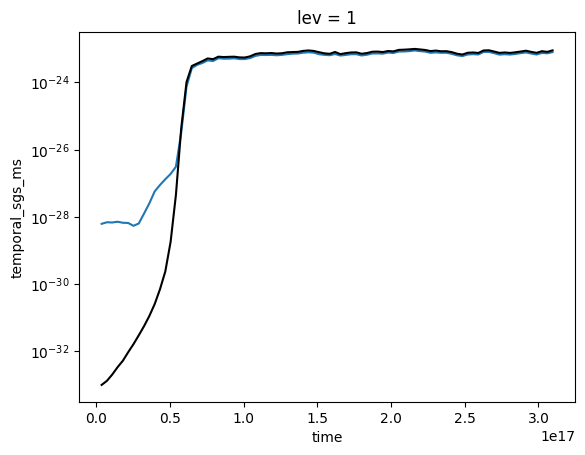

In [18]:
(offline.temporal_mse).isel(lev=0).plot()
(offline.temporal_sgs_ms).isel(lev=0).plot(color='k')
plt.yscale('log')

In [23]:
offline.L2_PSD

<xarray.DataArray 'L2_PSD' (lev: 2)>
array([0.9339568 , 0.10408884], dtype=float32)
Coordinates:
  * lev      (lev) int64 1 2

In [20]:
offline.L2_Eflux

<xarray.DataArray 'L2_Eflux' (lev: 2)>
array([0.8725376, 1.3654555], dtype=float32)
Coordinates:
  * lev      (lev) int64 1 2

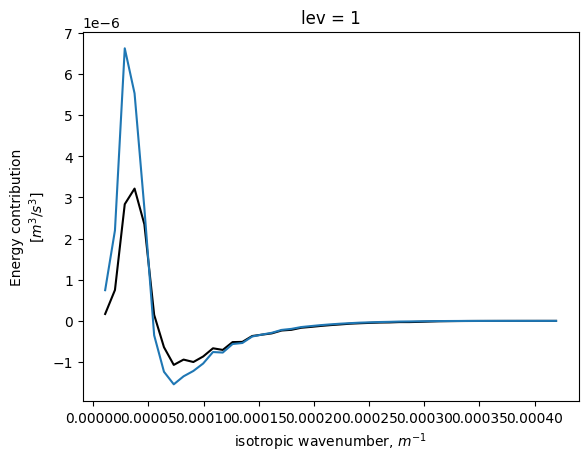

In [21]:
offline.Eflux.isel(lev=0).plot(color='k')
offline.Eflux_gen.isel(lev=0).plot()

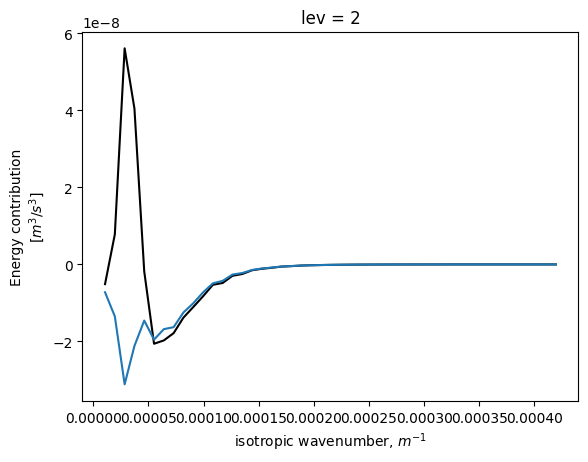

In [22]:
offline.Eflux.isel(lev=1).plot(color='k')
offline.Eflux_gen.isel(lev=1).plot()

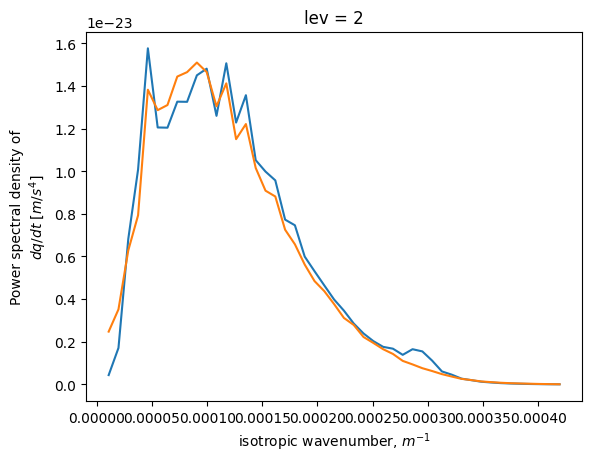

In [25]:
offline.PSD.isel(lev=1).plot()
offline.PSD_gen.isel(lev=1).plot()

In [27]:
offline.nmse.values

array([0.8908009, 1.1608969], dtype=float32)